## Support Vector Classifiers:

### What is a Support Vector Classifier (SVC)?

A Support Vector Classifier (SVC) is a type of Support Vector Machine (SVM) used for classification problems.
It tries to find the best boundary (decision line or plane) that separates data points of different classes.

### ⚙️ Core Idea

Imagine your data plotted in space (2D, 3D, etc.).

SVC tries to find a hyperplane that separates the classes with the maximum margin — meaning the largest possible distance between the hyperplane and the nearest points of each class.

Those nearest points are called Support Vectors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Lets create some data points:

In [2]:
from sklearn.datasets import make_classification


In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X.shape

(1000, 2)

In [5]:
y

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [6]:
pd.DataFrame(X)

,0,1
0,2.076635,-0.394687
1,1.065283,-0.927174
2,0.122112,1.802054
3,-0.513896,1.868007
4,-1.374678,0.729746
...,...,...
995,-1.676100,-0.702496
996,0.530810,1.443874
997,-1.097364,2.783249
998,-1.061817,0.203719


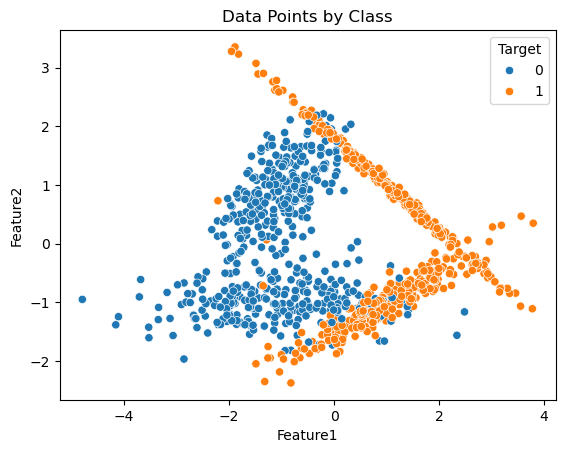

In [7]:
# Convert X to DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Plot
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df)
plt.title('Data Points by Class')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC(kernel='linear')

In [11]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [12]:
y_pred = svc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       123
           1       0.88      0.80      0.83       127

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

[[109  14]
 [ 26 101]]


### Using RBF kernel:

In [17]:
rbf = SVC(kernel='rbf')

In [18]:
rbf.fit(X_train,y_train)

SVC()

In [21]:
y_pred1 = rbf.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       123
           1       0.91      0.99      0.95       127

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250

[[110  13]
 [  1 126]]


### Using Polynomial Kernel:

In [24]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)


SVC(kernel='poly')

In [25]:
y_pred2 = poly.predict(X_test)


In [26]:
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.89      0.80      0.84       127

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250

[[110  13]
 [ 26 101]]


### Hyperparameter tunning with SVC

In [33]:
from sklearn.model_selection import GridSearchCV


#defining parameters
param_grid = {
        'C' : [0.1,1,10,100,1000],
        'gamma': [1,0.1,0.01,0.001,0.0001],
        'kernel' : ['rbf']
}

In [34]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [37]:
grid.best_score_

np.float64(0.9426666666666665)

In [38]:
#predictions:
y_pred4 = grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       123
           1       0.91      0.99      0.95       127

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250

[[110  13]
 [  1 126]]
